## Exploring the Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv("C:/cygwin64/home/Ian/dssg/Building_Violations_sample_50000.csv")

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
df.head()

,Unnamed: 0,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,...,INSPECTION STATUS,INSPECTION WAIVED,INSPECTION CATEGORY,DEPARTMENT BUREAU,ADDRESS,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
0,0,5063843,05/21/2015,05/21/2015,CN065014,OPEN,NaN,REPAIR LINTELS,OTHER : :,LINTELS; RUSTED.,...,FAILED,N,COMPLAINT,CONSERVATION,722 E 89TH ST,461523,51,41.733089,-87.606184,"(41.73308939713441,-87.60618433527188)"
1,1,5063990,05/21/2015,05/21/2015,CN044013,OPEN,NaN,PIPE OPENING W/NONCOMBUST MATL,OTHER : :MULTIPLE FLOORS,"OPENINGS AROUND PIPES, SEAL WITH APPROVED MATE...",...,FAILED,N,PERIODIC,CONSERVATION,6444 S DR MARTIN L KING JR DR,19575,NaN,41.777088,-87.615694,"(41.77708792596553,-87.61569442972947)"
2,2,5064022,05/21/2015,05/21/2015,CN104035,OPEN,NaN,MAINTAIN WINDOW,OTHER : :,"ALL ELEVATIONS , WOOD WINDOW FRAMES AND NORTH...",...,FAILED,N,COMPLAINT,CONSERVATION,3115 N SAWYER AVE,117375,NaN,41.937995,-87.708657,"(41.93799454179893,-87.70865671096144)"
3,3,5064019,05/21/2015,05/21/2015,CN196029,OPEN,NaN,POST OWNER/MANAGERS NAME/#,OTHER : :,BUILDING - NO OWNER'S I.D. SIGN POSTED .,...,FAILED,N,COMPLAINT,CONSERVATION,3115 N SAWYER AVE,117375,NaN,41.937995,-87.708657,"(41.93799454179893,-87.70865671096144)"
4,4,5064139,05/21/2015,05/21/2015,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",OTHER : :,NORTH ELEVATION / 1ST FLOOR - BROKEN WINDOW PANE.,...,FAILED,N,COMPLAINT,CONSERVATION,5649 S INDIANA AVE,344254,NaN,41.791470,-87.620616,"(41.791469839262206,-87.62061589476306)"


In [3]:
def snake_case(colName):
    s = colName.split()
    return '_'.join(s).lower()

df.columns = [snake_case(col) for col in df.columns] 

In [4]:
df.columns

Index([u'unnamed:_0', u'id', u'violation_last_modified_date', u'violation_date', u'violation_code', u'violation_status', u'violation_status_date', u'violation_description', u'violation_location', u'violation_inspector_comments', u'violation_ordinance', u'inspector_id', u'inspection_number', u'inspection_status', u'inspection_waived', u'inspection_category', u'department_bureau', u'address', u'property_group', u'ssa', u'latitude', u'longitude', u'location'], dtype='object')

In [5]:
df.describe()

,unnamed:_0,id,inspection_number,property_group,latitude,longitude
count,50000.000000,50000.000000,50000.000000,50000.000000,49952.000000,49952.000000
mean,24999.500000,3300031.329640,6195288.986320,197729.741420,41.845539,-87.673442
std,14433.901067,1088123.083684,4296079.998463,183132.260836,0.087437,0.057008
min,0.000000,742158.000000,375113.000000,1001.000000,41.644712,-87.914436
25%,12499.750000,2400057.500000,2021217.500000,20600.750000,41.771440,-87.714271
50%,24999.500000,3421152.000000,2813561.000000,142605.000000,41.854001,-87.670709
75%,37499.250000,4223617.750000,10630848.750000,363929.250000,41.912843,-87.634551
max,49999.000000,5064815.000000,11597625.000000,663759.000000,42.022645,-87.525898


In [6]:
df.iloc[0:5,0:20]

,unnamed:_0,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,inspector_id,inspection_number,inspection_status,inspection_waived,inspection_category,department_bureau,address,property_group,ssa
0,0,5063843,05/21/2015,05/21/2015,CN065014,OPEN,NaN,REPAIR LINTELS,OTHER : :,LINTELS; RUSTED.,Failed to maintain lintel in good repair and f...,BL00444,11597246,FAILED,N,COMPLAINT,CONSERVATION,722 E 89TH ST,461523,51
1,1,5063990,05/21/2015,05/21/2015,CN044013,OPEN,NaN,PIPE OPENING W/NONCOMBUST MATL,OTHER : :MULTIPLE FLOORS,"OPENINGS AROUND PIPES, SEAL WITH APPROVED MATE...",Failed to fill openings around exposed pipes o...,BL00748,10670852,FAILED,N,PERIODIC,CONSERVATION,6444 S DR MARTIN L KING JR DR,19575,NaN
2,2,5064022,05/21/2015,05/21/2015,CN104035,OPEN,NaN,MAINTAIN WINDOW,OTHER : :,"ALL ELEVATIONS , WOOD WINDOW FRAMES AND NORTH...",Failed to maintain windows in sound condition ...,BL00746,11597370,FAILED,N,COMPLAINT,CONSERVATION,3115 N SAWYER AVE,117375,NaN
3,3,5064019,05/21/2015,05/21/2015,CN196029,OPEN,NaN,POST OWNER/MANAGERS NAME/#,OTHER : :,BUILDING - NO OWNER'S I.D. SIGN POSTED .,"Post name, address, and telephone of owner, ow...",BL00746,11597370,FAILED,N,COMPLAINT,CONSERVATION,3115 N SAWYER AVE,117375,NaN
4,4,5064139,05/21/2015,05/21/2015,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",OTHER : :,NORTH ELEVATION / 1ST FLOOR - BROKEN WINDOW PANE.,"Replace broken, missing or defective window pa...",104976,11597397,FAILED,N,COMPLAINT,CONSERVATION,5649 S INDIANA AVE,344254,NaN


In [7]:
df.violation_status.value_counts()

OPEN        36355
COMPLIED    13500
NO ENTRY      145
dtype: int64

In [8]:
df.inspection_status.value_counts()

FAILED    38371
PASSED     6426
CLOSED     5199
HOLD          4
dtype: int64

In [9]:
df[df.inspection_status == "PASSED"].violation_status.value_counts()

COMPLIED    6253
OPEN         173
dtype: int64

In [10]:
df[df.inspection_status == "FAILED"].violation_status.value_counts()

OPEN        31775
COMPLIED     6452
NO ENTRY      144
dtype: int64

In [11]:
df[(df.inspection_status == "PASSED") & (df.violation_status == "OPEN")].head()

,unnamed:_0,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,...,inspection_status,inspection_waived,inspection_category,department_bureau,address,property_group,ssa,latitude,longitude,location
226,226,5044573,05/11/2015,04/30/2015,PL151137,OPEN,NaN,OPEN,NaN,NaN,...,PASSED,N,PERMIT,PLUMBING,5633 S NASHVILLE AVE,358013,NaN,41.789432,-87.786440,"(41.78943194307618,-87.78644017391142)"
273,273,5039573,04/24/2015,04/24/2015,PL151137,OPEN,NaN,OPEN,NaN,NaN,...,PASSED,N,PERMIT,PLUMBING,5635 W IOWA ST,56223,NaN,41.896546,-87.766816,"(41.89654608593096,-87.76681614831138)"
343,343,5035502,04/21/2015,04/21/2015,VT1010,OPEN,NaN,ARRANGE COMPLETED PERMIT INSP.,NaN,NaN,...,PASSED,N,PERMIT,VENTILATION,1 N WACKER DR,1035,NaN,41.881952,-87.636620,"(41.88195187648601,-87.63662034940238)"
549,549,5021108,04/07/2015,04/03/2015,VT1010,OPEN,NaN,ARRANGE COMPLETED PERMIT INSP.,NaN,NaN,...,PASSED,N,PERMIT,VENTILATION,3308 N WESTERN AVE,244838,38,41.941586,-87.688376,"(41.94158571345376,-87.68837619919587)"
826,826,4999567,03/16/2015,03/11/2015,EL0084,OPEN,NaN,SEE INSPECTOR COMMENTS,NaN,SEE DEFECT NOTICE.,...,PASSED,N,PERMIT,ELECTRICAL,2155 N SEMINARY AVE,85183,NaN,41.921499,-87.655762,"(41.921499471067406,-87.65576166349518)"


In [12]:
df[(df.inspection_status == "PASSED") & (df.violation_status == "OPEN")].violation_status_date.isnull().value_counts()

True    173
dtype: int64

In [13]:
df[df.violation_status == "OPEN"].violation_status_date.isnull().value_counts()

True     36352
False        3
dtype: int64

In [14]:
df.violation_code.value_counts()

CN190019    2463
CN196029    1619
CN061014    1488
CN070024    1326
CN193110    1065
CN104015    1011
NC2011       964
CN070014     937
CN198019     904
CN197019     890
EV1110       730
CN138056     725
CN138106     696
CN197087     638
CN015062     625
...
BR1073      1
PL151047    1
CN114025    1
CN110035    1
EV0185      1
IR0082      1
IR0092      1
CN193353    1
CN193355    1
BR1060      1
PL234046    1
PL234010    1
EV1180      1
IR0086      1
FR910       1
Length: 757, dtype: int64

In [15]:
df[df.violation_code == "NC2021"].violation_description.value_counts()

PERMIT REQUIRED - CONTRACTOR    548
dtype: int64

In [16]:
# delete rows with inspection status CLOSED or HOLD

df = df[(df.inspection_status == "PASSED") | (df.inspection_status == "FAILED")]
len(df.inspection_status) # to confirm!

44797

In [17]:
df['ind_pf'] = df.inspection_status == "FAILED"
df['ind_pf'] = df['ind_pf'].astype(int)
df.ind_pf.value_counts()

1    38371
0     6426
dtype: int64

In [18]:
buildingGroups = df.groupby('property_group')
buildingGroups = buildingGroups.aggregate(np.sum)
buildingGroups.ind_pf.order(ascending=False).head(10)

property_group
6124              25
21767             15
1555              13
20509             12
35298             12
20787             12
19681             12
20660             12
430699            12
25617             11
Name: ind_pf, dtype: int32

,address,property_group
4748,1900 N AUSTIN AVE,6124


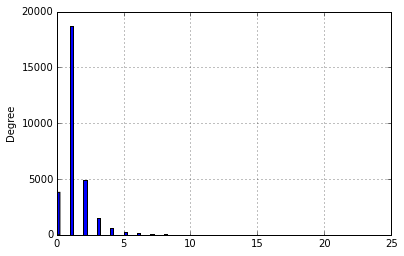

In [19]:
buildingGroups.ind_pf.plot(kind="hist", bins=100) 
buildingGroups[buildingGroups.ind_pf == buildingGroups.ind_pf.max()]
df[df.property_group == 6124][['address', 'property_group']].head(1)

In [20]:
features = pd.crosstab(df.property_group,df.violation_code,margins=True)
features.head()

violation_code,020008,190019,199029,BR1000,BR1001,BR1010,BR1024,BR1041,BR1042,BR1043,...,VT5030,VT6010,VT6020,VT6030,VT7010,VT7020,VT8010,VT8020,VT8030,All
property_group,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1002,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
features2 = pd.crosstab(df.property_group,df.inspection_status,margins=True)
del features2['All']
features3 = pd.concat([features, features2], axis=1)
features3.head()

,020008,190019,199029,BR1000,BR1001,BR1010,BR1024,BR1041,BR1042,BR1043,...,VT6020,VT6030,VT7010,VT7020,VT8010,VT8020,VT8030,All,FAILED,PASSED
property_group,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,0
1002,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
